In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
ATrot = np.array([1* 60 + 17.50, 1*60 + 17.12, 60 + 16.18, 60 +16.94, 60 + 17.57, 60+ 17.59, 60 + 17.53, 60 + 18.06])
ATcyl = np.array([60 +37.60, 60 +38.07, 60 +37.13, 60 + 37.54, 60 + 37.62, 60 + 36.84, 60 +37.40, 60 + 37.38, 60 +37.52])


mcyl = 1.6189
Rcyl = 0.0781/2. # ISU 

In [114]:
Trot = ATrot.mean() / 10.
Tcyl = ATcyl.mean() / 10.
print(Tcyl, Trot)

(9.7455555555555549, 7.7311250000000005)


In [104]:
g = 9.814

In [105]:
Icyl = (mcyl *(Rcyl*Rcyl)/2.)
print(Icyl)


I0 = (Trot/Tcyl)**2 * Icyl
print(I0)

0.00123433232862
0.000776791189432


In [116]:
import math 
r = 121 /1000.
k = g * r / (2. * math.pi * I0)
print "System ratio = k = ", k

System ratio = k =  243.302888296


In [118]:
m = np.array([141.,  60., 76., 92., 116., 141., 173., 215., 270., 336.])
m /= 1000.
T = np.array([83.84,
              (3. * (64.84 + 65.31) + 2.*(60. + 45.62 + 60. + 45.41)) / 4.,
              3. * (53.35 + 52.65) / 2.,
              3. * (43.84 + 42.31) / 2.,
              3. * (34.72 + 34.35) / 2.,
              3. * (28.28 + 28.59) / 2.,
              3. * (22.50 + 22.65) / 2.,
              3. * (18.25 + 18.78) / 2.,
              2. * (22.41 + 22.10) / 2.,
              2. * (17.91 + 17.75) / 2.])
print "Time = ", T
W0 = m * T* k
print "w0 = ", W0

Time =  [  83.84    203.1275  159.      129.225   103.605    85.305    67.725
   55.545    44.51     35.66  ]
w0 =  [ 2876.19049582  2965.29044654  2940.07210217  2892.55504809  2924.05790607
  2926.44835694  2850.64004301  2905.56567004  2923.94112068  2915.19681487]


Frequency =  [ 457.75993468  471.94063227  467.92700811  460.36443407  465.37826964
  465.75872171  453.69345382  462.43513887  465.35968267  463.96798317]
mean frequency =  463.4585259


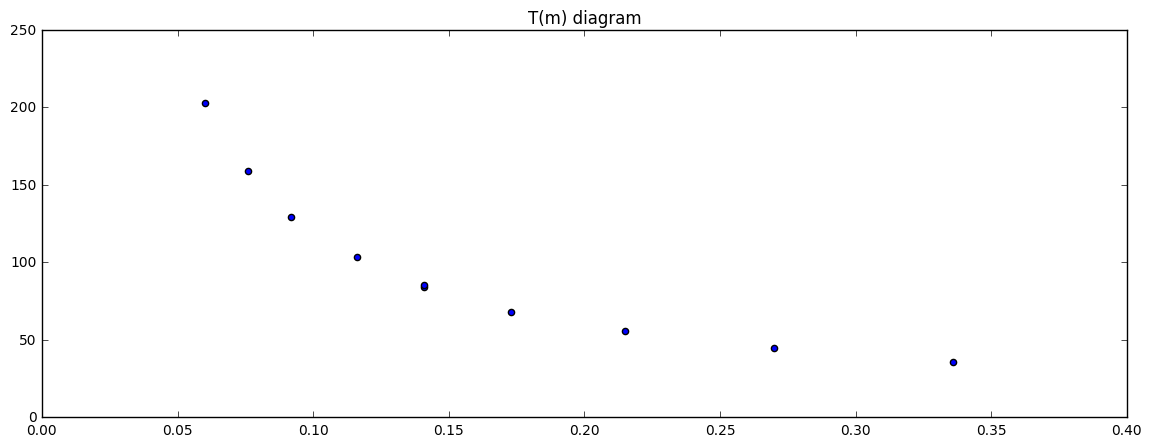

In [120]:
T0 = W0 / (2. * math.pi)
print "Frequency = " , T0
print "mean frequency = ", T0.mean()

plt.figure(figsize=(14,5))
plt.title("T(m) diagram")
plt.scatter(m, T)
plt.show()
TR = [466]


In [109]:
angl = 10. # (grad)
mangl = 141. / 1000.
tAngl = [5. * 60 + 32.18, 5. * 6. + 36.68]

# Imaginary part

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import random

In [102]:
def sciPrintR(val, relErr):
    print(val, "+-", val * relErr, "(", relErr * 100., "%)")
    
def sciPrintD(val, dErr):
    print(val, "+-", dErr, "(", (dErr/val) * 100., "%)")
    
def prodErrorR(errors):
    errors = np.array(errors)
    return np.sqrt((errors**2).sum())


print(math.sqrt(0.1*0.1  + 0.6*0.6 + 0.4*0.4))
prodErrorR([0.1,0.6,0.4])


0.728010988928


0.72801098892805183

In [103]:
ATrot = np.array([1* 60 + 17.50, 1*60 + 17.12, 60 + 16.18, 60 +16.94, 60 + 17.57, 60+ 17.59, 60 + 17.53, 60 + 18.06])
ATcyl = np.array([60 +37.60, 60 +38.07, 60 +37.13, 60 + 37.54, 60 + 37.62, 60 + 36.84, 60 +37.40, 60 + 37.38, 60 +37.52])


mcyl = 1.6189
dmcyl = 0.0005

Rcyl = 0.0781/2. # ISU 
dRcyl = 0.0001

In [104]:

ATrot = ATrot / 10.
ATcyl = ATcyl / 10.

Trot = ATrot.mean()
Tcyl = ATcyl.mean()

dTrot = ATrot.std(ddof=1.) / math.sqrt(ATrot.size)
dTcyl = ATcyl.std(ddof=1.) / math.sqrt(ATcyl.size)
sciPrintD(Tcyl, dTcyl)
sciPrintR(Trot, dTrot)

(9.7455555555555549, '+-', 0.011367731024350113, '(', 0.11664528471001144, '%)')
(7.7311250000000005, '+-', 0.15472212693720577, '(', 2.0012886473470002, '%)')


In [105]:
g = 9.814

In [106]:
Icyl = (mcyl *(Rcyl*Rcyl)/2.)
EIcyl = prodErrorR([dmcyl/mcyl, dRcyl / Rcyl, dRcyl / Rcyl])
sciPrintR(Icyl, EIcyl)

I0 = (Trot/Tcyl)**2 * Icyl

EI0 = prodErrorR([EIcyl, dTrot/Trot, dTrot/Trot, dTcyl/Tcyl, dTcyl/Tcyl])
sciPrintR(I0, EI0)

(0.001234332328625, '+-', 4.486417172451394e-06, '(', 0.36346914590247303, '%)')
(0.00077679118943205629, '+-', 4.2071713156841624e-06, '(', 0.54160904151863476, '%)')


In [107]:
r = 121 / 1000.
dr = 1 / 1000.

k = g * r / (2. * math.pi * I0)
Ek = prodErrorR([dr/r, EI0])
print("System ratio = k = ")
sciPrintR(k, Ek)

System ratio = k = 
(243.30288829633807, '+-', 2.4040908584654175, '(', 0.98810617305014592, '%)')


In [131]:
m = np.array([60., 76., 92., 116., 141., 173., 215., 270., 336.])
m /= 1000.
dm = 1. / 1000.

T_measured = [
    [3. * 64.84, 3. * 65.31, 2. * (60.+ 45.62), 2. * (60. + 45.41)],
    [3. * 53.35, 3. * 52.65],
    [3. * 43.84, 3. * 42.31],
    [3. * 34.72, 3. * 34.35],
    [3. * 28.28, 3. * 28.59, 83.84],
    [3. * 22.50, 3. * 22.65],
    [3. * 18.25, 3. * 18.78],
    [2. * 22.41, 2. * 22.10],
    [2. * 17.91, 2. * 17.75]
]

    
    
T_measured_means = np.array([(np.array(A)).mean() for A in T_measured])
    
T = np.array([(3. * (64.84 + 65.31) + 2.*(60. + 45.62 + 60. + 45.41)) / 4.,
              3. * (53.35 + 52.65) / 2.,
              3. * (43.84 + 42.31) / 2.,
              3. * (34.72 + 34.35) / 2.,
              (3. * (28.28 + 28.59) + 83.84)/ 3.,
              3. * (22.50 + 22.65) / 2.,
              3. * (18.25 + 18.78) / 2.,
              2. * (22.41 + 22.10) / 2.,
              2. * (17.91 + 17.75) / 2.])

assert (abs((T -T_measured_means).sum()) < 1e-10)
'''
FREQ_ABS = 466.
W0 = m * T* k
FREQ = W0 / (2. * math.pi)

TESTS = 4
for i, Tm in enumerate(T_measured):
    good_W0 = FREQ_ABS * (2. * math.pi)
    good_T = good_W0 / (m[i] * k)
    while len(T_measured[i]) < TESTS:
        T_measured[i].append((2.*good_T - np.array(T_measured[i]).mean()) * random.uniform(0.96, 1.04))
'''

T_measured = [
    [194.52, 195.93, 211.24, 210.82],
    [160.05, 157.95, 157.07801283267204, 152.08710452169683],
    [131.52, 126.93, 133.47415338612211, 129.54406182900343],
    [104.16, 103.05000000000001, 106.92109363516123, 102.85321536937906],
    [84.84, 85.77, 83.84, 83.751844268393143],
    [67.5, 67.94999999999999, 73.155884917584288, 68.545138669926828],
    [54.75, 56.34, 55.828584969593955, 55.27750939370253],
    [44.82, 44.2, 43.00717017969194, 43.889597908432215],
    [35.82, 35.5, 35.728597844411894, 34.758829808216987]
]
print(T_measured)

[[194.52, 195.93, 211.24, 210.82], [160.05, 157.95, 157.07801283267204, 152.08710452169683], [131.52, 126.93, 133.4741533861221, 129.54406182900343], [104.16, 103.05000000000001, 106.92109363516123, 102.85321536937906], [84.84, 85.77, 83.84, 83.75184426839314], [67.5, 67.94999999999999, 73.15588491758429, 68.54513866992683], [54.75, 56.34, 55.828584969593955, 55.27750939370253], [44.82, 44.2, 43.00717017969194, 43.889597908432215], [35.82, 35.5, 35.728597844411894, 34.75882980821699]]


In [132]:
T = np.array(T_measured).mean(axis=1)
dT = (np.array(T_measured).std(axis=1,ddof=1))  # corr. dev
print("T = ", T)
print("dT = ", dT)
W0 = m * T* k
EW0 = prodErrorR([dm/m, dT/T, Ek])
print("EW0 = ", EW0)
T0 = W0 / (2. * math.pi)
ET0 = EW0

('T = ', array([ 203.1275    ,  156.79127934,  130.3670538 ,  104.24607725,
         84.55046107,   69.2877559 ,   55.54902359,   43.97919202,
         35.45185691]))
('dT = ', array([ 9.14476672,  3.37507386,  2.797261  ,  1.87383626,  0.95107864,
        2.61403675,  0.68701211,  0.75466721,  0.48122039]))
('EW0 = ', array([ 0.04901223,  0.02709483,  0.02600341,  0.02224987,  0.01656704,
        0.0394258 ,  0.01649933,  0.02014463,  0.01705122]))


Frequency =  [ 471.94063227  461.426882    464.43300403  468.25789342  461.63899732
  464.16244046  462.46863693  459.80999423  461.25985843]
mean frequency =  463.933148788


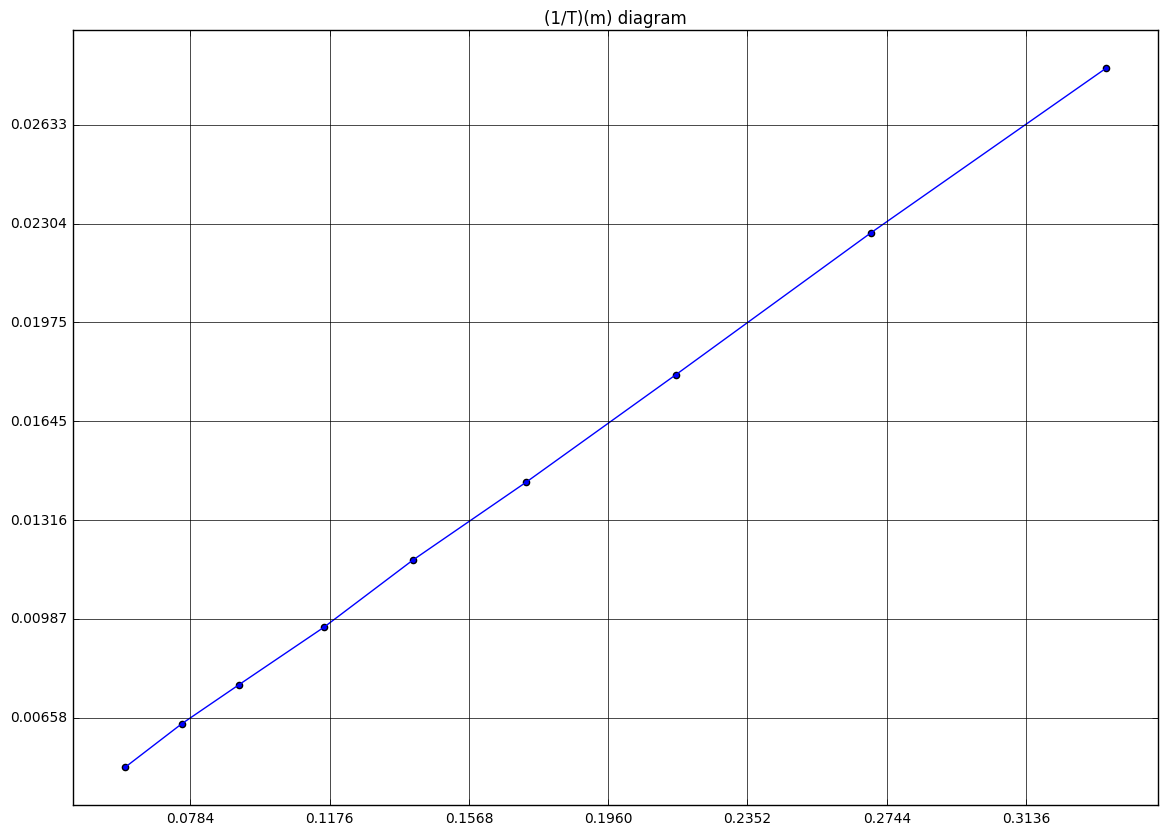

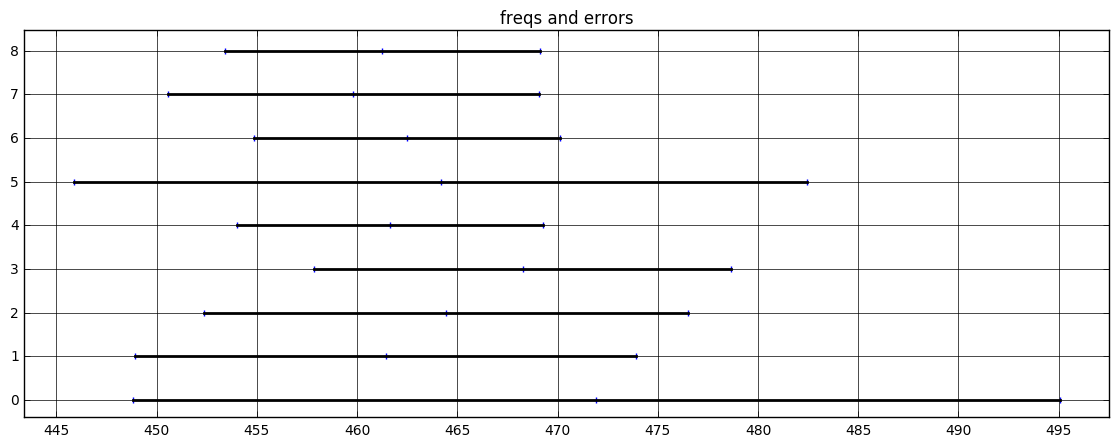

(471.94063227078885, '+-', 23.130863269181571, '(', 4.9012230961943546, '%)')
(461.4268820015082, '+-', 12.502285137707316, '(', 2.7094834794793017, '%)')
(464.43300402851753, '+-', 12.076843251141529, '(', 2.6003413078713877, '%)')
(468.25789341828994, '+-', 10.418677999321442, '(', 2.2249871589488714, '%)')
(461.63899732317748, '+-', 7.647991718798627, '(', 1.656703996660952, '%)')
(464.16244046237023, '+-', 18.29997416842286, '(', 3.9425797033886552, '%)')
(462.46863692573038, '+-', 7.630424303521619, '(', 1.6499333563990457, '%)')
(459.80999423200183, '+-', 9.2627023373967354, '(', 2.0144630289882617, '%)')
(461.25985843328027, '+-', 7.865044401025437, '(', 1.7051222336450269, '%)')


In [171]:

print "Frequency = " , T0
print "mean frequency = ", T0.mean()

fig = plt.figure(figsize=(14,10))
plt.title("(1/T)(m) diagram")
plt.grid(which='major', axis='both', linestyle='-')
ax = fig.gca()
ax.set_xticks(np.linspace(0., m.max() * 1.05, 10))
ax.set_yticks(np.linspace(0.,(1./T).max() * 1.05, 10))
plt.plot(m, 1./T)
plt.scatter(m, 1./T)
plt.show()

fig = plt.figure(figsize=(14,5))
plt.title("freqs and errors")
plt.grid(which='major', axis='both', linestyle='-')
ax = fig.gca()
ax.set_yticks(np.arange(0, T0.size, 1))
ax.set_xticks(np.arange(int((T0-T0*ET0).min()), int((T0+T0*ET0).max()) + 1, 5.))
for i, (F, EF) in enumerate(zip(T0, ET0)):
    plt.plot([F - F*EF, F + F*EF], np.ones(2) * i, color="black", linewidth=2.)
    plt.scatter(F - F*EF, [i], marker='|')
    plt.scatter(F, [i], marker='+')
    plt.scatter(F + F*EF, [i], marker='|')
plt.show()

for F, EF in zip(T0, ET0):
    sciPrintR(F, EF)


In [17]:
angl = 10. # (grad)
mangl = 141. / 1000.
tAngl = [5. * 60 + 32.18, 5. * 6. + 36.68]